In [1]:
!pip install pylatexenc

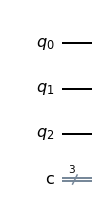

In [2]:
#This is an algorithm used to build QUANTUM TELEPORTATION. Now for normal classical computers, we just copy paste data from one place to another. However, in QC, if we notice the data to copy it, we essentially make a measurement. This is why Quantum Teleportation is necessary. 
from qiskit import *

circuit = QuantumCircuit(3, 3)
%matplotlib inline
circuit.draw(output = 'mpl')

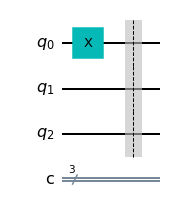

In [3]:
#Now here, what we'll be doing is that we will be using q1 to transport data from q0 to q3. For this we will use an x gate to init q0 to 1 state and a barrier for connection
circuit.x(0)
circuit.barrier()
circuit.draw(output = 'mpl')

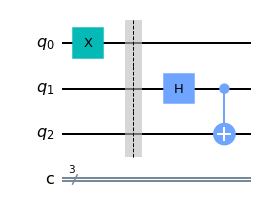

In [4]:
#THe next step is to create entanglement, so that the behavior of the first qubit affects the behavior of the second qubit. THis is done as: 
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output = 'mpl')

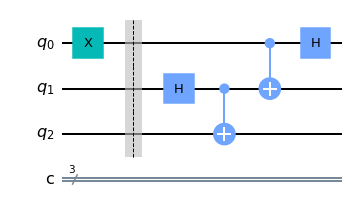

In [5]:
#The next step of the algorithm is to create a controlled gate between 0 and 1. Also we will be applying a Hadamard gate to q0. 
circuit.cx(0 , 1)
circuit.h(0)
circuit.draw(output = 'mpl')

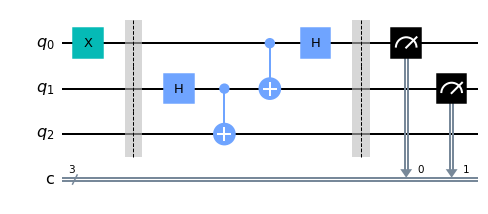

In [6]:
#the next step is to do the two measurements on q0 and q1. 
circuit.barrier() 
# Done for clarification
circuit.measure([0,1], [0,1])
circuit.draw(output = 'mpl')

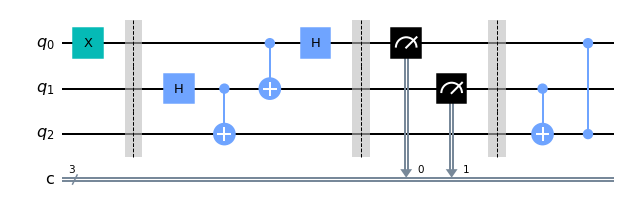

In [7]:
#The last step is to add two more gates, controlled x and controlled z
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output = 'mpl')

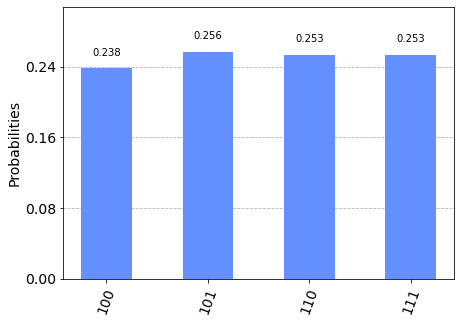

In [8]:
#That is the algorithm. Now what this has theoretically done is that it will send the data from q0 to q2. Since q2 starts in state 0 and we  are saying that we have transported state 1 to this qubit. Hence q3 should always showw state 1. This can be checked by the following method:
sim = Aer.get_backend('qasm_simulator')
circuit.measure(2, 2)
result = execute(circuit, backend = sim, shots = 1000).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
#now what this graph shows can be read by the fact that the number 100 or 101 etc are read as Classicalbit3data, classicalbit2data, classicalbit1data. Since only those options are shown, wherein the classicalbit 3 data is 1, ot proves our point!